Felix Oliveira Miranda - 202265503B

Maria Eduarda Ribeiro Facio - 202065516B

# Bibliotecas necessárias

In [7]:
# Importando bibliotecas necessárias
import os
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
from scipy.optimize import differential_evolution

# Introdução

A raiva é uma encefalite aguda causada por um vírus do gênero Lyssavirus, com uma taxa de letalidade próxima de 100%. Apesar de ser uma doença prevenível por vacina, ela ainda impõe um grande fardo global, causando milhares de mortes anualmente. Os esquemas de vacinação para profilaxia pré-exposição (PrEP) e pós-exposição (PEP) da raiva são variados e diferem em termos de número e tempo das doses, número de visitas, duração do esquema e rota de administração (intradérmica ou intramuscular).

O objetivo deste estudo é adaptar um modelo de imunologia computacional, originalmente desenvolvido para a febre amarela, para modelar a resposta imunológica à vacinação contra a raiva. Este modelo será utilizado para explorar como diferentes parâmetros de vacinação afetam a resposta imune, em particular, os títulos de anticorpos ao longo do tempo. A adaptação do modelo foi baseada em uma análise sistemática e meta-análise dose-resposta de estudos sobre PrEP e PEP para raiva, que investigou como as diferenças nos esquemas de vacinação influenciam os títulos de anticorpos ao longo do tempo.

# Análise dos dados reais

Os dados reais utilizados para comparação com o modelo gerado foram extraídos diretamente dos gráficos apresentados no artigo sobre a raiva utilizando a ferramenta WebPlotDigitizer. Essa abordagem permitiu capturar com precisão as informações gráficas de títulos de anticorpos ao longo do tempo, estratificados por diferentes fatores como rota de administração, grupo etário e esquema de vacinação. Esses dados extraídos foram essenciais para validar o modelo computacional desenvolvido, permitindo uma comparação direta entre as previsões do modelo e os resultados experimentais relatados no artigo.

## Dados PrEP

In [8]:
data_prep_overall = [(0.0805161290321621, 0.023834818418257055),
 (1.4183225806450537, 0.035224386799112745),
 (3.2912516129031246, 0.05493795590874308),
 (4.387096774193537, 0.08867757786062508),
 (5.431741935483785, 0.13363819664066856),
 (6.501987096774087, 0.22294949245338627),
 (8.774193548387075, 0.3701742506624781),
 (10.782967741935408, 0.6911195424628571),
 (11.612903225806406, 1.102333782273452),
 (14.193548387096712, 1.9271180607070566),
 (14.967741935483843, 3.036473774551933),
 (17.290322580645125, 5.239899894849923),
 (19.612903225806406, 8.81034566424584),
 (21.935483870967687, 14.0635807040328),
 (24.258064516129025, 21.59104312375584),
 (27.87096774193543, 33.58095856402324),
 (32.774193548387075, 36.3030891790301),
 (37.41935483870964, 30.26628361065245),
 (41.290322580645125, 22.742626581257657),
 (44.90322580645153, 16.868652624906222),
 (48.51612903225805, 12.033582019822884),
 (52.64516129032256, 9.160479236004528),
 (56.25806451612897, 6.883347861595088),
 (60.38709677419348, 6.203913392544181),
 (66.5806451612903, 5.664655248278801),
 (73.80645161290323, 5.448139722861101),
 (85.16129032258061, 4.784435978021396),
 (96.51612903225805, 4.601564360207874),
 (109.93548387096774, 4.312178759034675),
 (126.19354838709677, 4.040992191844491),
 (138.83870967741933, 3.9373544556953908),
 (151.99999999999994, 3.7379846845170532),
 (162.5161290322581, 3.5899252837864504),
 (172.19354838709688, 3.4626921705327858),
 (185.81362007168462, 3.2215942042627708),
 (201.94265232974914, 2.997283242576705),
 (216.63799283154123, 2.8650907304101234),
 (230.97491039426524, 2.665602149195962),
 (243.6989247311829, 2.571128634198418),
 (252.12186379928318, 2.457731292088725),
 (265.2043010752688, 2.3706250770246675),
 (277.92831541218646, 2.2055648127241874),
 (290.47311827957, 2.1466744181549577),
 (302.83870967741944, 2.0335689099729723),
 (313.4121863799283, 1.9264227852321383),
 (324.34408602150546, 1.8581470555073798),
 (334.3799283154122, 1.7922911348220407),
 (345.31182795698925, 1.6826096998155373),
 (354.27240143369187, 1.652523429992744),
 (364.3082437275986, 1.579640353571485)]

data_prep_byRoute_intradermal = [(0.0, 0.012996342206084487),
 (0.7964601769911042, 0.021144783949800756),
 (2.7876106194689783, 0.03849159021949669),
 (4.778761061946966, 0.0687698970166386),
 (7.1681415929202785, 0.12996342206084516),
 (10.752212389380475, 0.40715155477896936),
 (13.141592920354014, 0.7411714795000632),
 (16.72566371681421, 1.6577238855893144),
 (19.115044247787637, 3.1328165134675503),
 (21.10619469026551, 5.097028631688902),
 (25.088495575221145, 8.449466108283314),
 (28.274336283185903, 12.058708946926577),
 (35.44247787610618, 11.83506729519469),
 (40.22123893805315, 8.609131660626792),
 (46.59292035398221, 5.193344763543807),
 (54.95575221238937, 2.4105371063566343),
 (66.90265486725662, 1.9990009850689754),
 (76.85840707964599, 1.7866213535081519),
 (84.42477876106204, 1.5381258460038891),
 (93.98230088495575, 1.5095996574802422),
 (112.69911504424772, 1.3241927918860426),
 (130.6194690265486, 1.1615573317032957),
 (155.3097345132744, 0.9814539307055016),
 (183.58407079646008, 0.8449466108283331),
 (204.29203539822993, 0.7139347751502866),
 (221.81415929203536, 0.6262503296462011),
 (242.92035398230087, 0.5391471540435064),
 (262.43362831858394, 0.4909722096368215),
 (278.7610619469026, 0.44710188828375347),
 (302.25663716814165, 0.37077094260385735),
 (319.3805309734512, 0.33764108294755646),
 (336.1061946902653, 0.30176912023627983),
 (350.04424778761063, 0.2799977049231396),
 (362.3893805309733, 0.25497879539629237)]

data_prep_byRoute_intramuscular = [(0.0, 0.0168904910737653),
 (1.19469026548677, 0.02456087882417329),
 (2.7876106194689783, 0.0363894599009939),
 (3.185840707964644, 0.05291480935646829),
 (5.176991150442404, 0.09278540650677108),
 (6.371681415929174, 0.14816025176256595),
 (7.964601769911496, 0.25979700872256445),
 (9.557522123893932, 0.42268443944722545),
 (11.15044247787614, 0.7551770453120349),
 (11.946902654867245, 1.098121530019631),
 (13.141592920354014, 1.7209662670181498),
 (14.734513274336337, 2.7480484808533396),
 (17.12389380530965, 5.002498785489558),
 (19.115044247787637, 9.632518180972776),
 (21.10619469026551, 15.67191080378305),
 (24.690265486725707, 25.979700872256444),
 (27.876106194690237, 39.960049383067506),
 (35.44247787610618, 41.48453045435301),
 (40.6194690265487, 29.617248922143794),
 (44.20353982300878, 20.367751582919755),
 (47.78761061946898, 14.541246146668708),
 (52.566371681415944, 9.278540650677128),
 (58.93805309734512, 6.14635847636879),
 (69.29203539823004, 5.597156879584084),
 (79.2477876106193, 5.097028631688902),
 (95.57522123893796, 4.72929873567906),
 (110.3097345132744, 4.38809905681941),
 (128.23008849557527, 4.226844394472255),
 (142.56637168141583, 4.14845304543531),
 (159.29203539822993, 3.9960049383067506),
 (176.4159292035397, 3.777772252003047),
 (194.73451327433622, 3.5714578456080694),
 (209.8672566371681, 3.440213263039759),
 (223.40707964601756, 3.3137916802654224),
 (240.1327433628319, 3.017691202362798),
 (256.0619469026549, 2.9617248922143737),
 (270.7964601769911, 2.906796537132125),
 (285.1327433628319, 2.799977049231396),
 (303.05309734513276, 2.59797008722565),
 (317.3893805309733, 2.456087882417324),
 (330.929203539823, 2.456087882417324),
 (343.2743362831857, 2.3219542502889787),
 (353.6283185840707, 2.2788911258644644),
 (365.1769911504423, 2.236626653129565)]

data_prep_byAge_under18 = [(0.0, 0.01),
 (3.444976076555065, 0.02566591343412495),
 (6.889952153110073, 0.07336637748600079),
 (10.334928229665081, 0.20414630347954787),
 (14.354066985645943, 0.6858944835078218),
 (18.94736842105266, 1.9606391068744613),
 (22.392344497607723, 6.951927961775591),
 (25.83732057416273, 15.594895040582832),
 (28.133971291866033, 31.410584890748986),
 (42.488038277511976, 24.649769667586163),
 (48.803827751196195, 14.77714868970755),
 (55.11961722488036, 8.62328052901494),
 (67.7511961722488, 7.9539855070234315),
 (81.53110047846889, 7.336637748600049),
 (93.01435406698567, 6.412354795576917),
 (103.34928229665076, 5.914660544591758),
 (114.83253588516749, 5.6045146882445795),
 (127.46411483253593, 4.898447745345473),
 (137.79904306220106, 4.398198780581134),
 (154.44976076555025, 3.7419623646575464),
 (172.24880382775126, 3.359818286283788),
 (207.84688995215316, 2.6366508987303554),
 (240.00000000000006, 2.1256187881920052),
 (272.7272727272728, 1.8084643063750914),
 (296.842105263158, 1.4977474763452001),
 (320.95693779904303, 1.3090585281163793),
 (346.2200956937799, 1.1137395078578651),
 (364.0191387559809, 1.0)]

data_prep_byAge_18to50 = [(0.0, 0.027086228509336768),
 (2.8708133971292114, 0.06951927961775647),
 (6.3157894736842195, 0.1934415251350537),
 (9.760765550239284, 0.5680492161728429),
 (12.057416267942585, 1.4579502008614655),
 (14.928229665071797, 3.359818286283788),
 (19.521531100478512, 8.858667904100832),
 (23.540669856459374, 18.329807108324452),
 (29.856459330143593, 34.98320935775047),
 (35.59808612440196, 28.20281104255998),
 (39.61722488038282, 19.872184654880616),
 (44.78468899521533, 12.572313579362095),
 (48.22966507177034, 7.9539855070234315),
 (52.24880382775126, 5.455594781168537),
 (59.71291866028713, 3.451530344648688),
 (75.21531100478467, 3.2705431474327398),
 (94.73684210526318, 2.9365422743449434),
 (114.25837320574163, 2.858514179684489),
 (136.65071770334936, 2.858514179684489),
 (160.19138755980867, 2.782559402207126),
 (187.75119617224885, 2.566591343412495),
 (210.14354066985658, 2.6366508987303554),
 (235.9808612440192, 2.566591343412495),
 (269.85645933014365, 2.4983933698814664),
 (298.5645933014354, 2.43200751326795),
 (324.40191387559815, 2.43200751326795),
 (350.2392344497609, 2.367385623054386),
 (365.1674641148326, 2.3044808281507536)]

## Dados PEP

In [9]:
data_pep_overall = [(-0.5294117647059124, 0.02166989352869447),
 (1.5882352941176805, 0.045753703919894584),
 (4.764705882352928, 0.11959561598507377),
 (6.882352941176521, 0.2963807258965308),
 (9.529411764705912, 0.5475595684633618),
 (12.705882352941217, 1.679908364440958),
 (16.941176470588232, 4.75688993862811),
 (21.176470588235304, 11.476128340268207),
 (27.0, 24.22398139680383),
 (30.176470588235304, 29.98450237805573),
 (37.58823529411768, 22.946482034804944),
 (42.35294117647061, 15.78497212381109),
 (47.117647058823536, 8.77036974275294),
 (51.882352941176464, 6.033170648768124),
 (59.29411764705884, 3.830058929467984),
 (72.0, 3.4388991306625427),
 (88.41176470588238, 3.170357733112029),
 (110.64705882352939, 3.1651344059940296),
 (130.23529411764713, 2.91728384564816),
 (149.82352941176475, 2.9918652462243296),
 (177.88235294117646, 2.7558511365010534),
 (202.23529411764707, 2.607852565281863),
 (222.3529411764706, 2.5353675102691278),
 (242.47058823529414, 2.5315878890874757),
 (261.52941176470586, 2.528012392950398),
 (279.0, 2.458228989266547),
 (299.11764705882354, 2.326944466306188),
 (320.2941176470589, 2.2620896044266017),
 (338.82352941176475, 2.2589834204541286),
 (363.7058823529412, 2.1375844113841382)]

data_pep_byRoute_intradermal = [(-0.07056731930799742, 0.017978501598543133),
 (1.5853030337566452, 0.03891049750447517),
 (4.933147949764248, 0.10147504772415947),
 (7.140428053700589, 0.286613867036215),
 (11.041323821028982, 0.9498470586853114),
 (15.519886946413521, 2.6832711084843006),
 (18.882501766462497, 5.506951689769128),
 (23.94529665169921, 11.921584020742582),
 (28.43534748022705, 27.952480272746236),
 (34.679734688760846, 28.719810468699478),
 (39.8213023955509, 17.32580817331868),
 (47.82987258678463, 6.6491435649207435),
 (60.335058008342344, 5.378754723498632),
 (73.41298748660927, 4.01729831373123),
 (88.76384108677325, 2.9221245388330934),
 (113.74959542315332, 2.8506270121907704),
 (137.03188749344713, 2.7805286071779967),
 (167.6958493834477, 2.713634718130388),
 (201.19891505025885, 2.6489061920552697),
 (235.83762222779387, 2.585938779470292),
 (259.1199142980877, 2.522349196151836),
 (290.91951769881234, 2.4618733026179322),
 (321.0172999339002, 2.339434243769649),
 (346.56923392519343, 2.3438585180168396),
 (364.73949809677947, 2.3470097581482436)]

data_pep_byRoute_intramuscular = [(-0.11651813188063898, 0.03788361718304549),
 (2.102249675198891, 0.08881061700268944),
 (5.458300093451726, 0.2027468722608073),
 (8.231759852301025, 0.5881268041657947),
 (11.594374672349886, 1.2070289460347547),
 (13.25516832676135, 2.4118431063702674),
 (16.048321290999183, 5.083211400869459),
 (20.525243315934745, 14.747203892323537),
 (24.472089895835893, 23.193603146882023),
 (28.42550087753284, 32.79323002052074),
 (35.81209399858699, 30.292793217377945),
 (40.37763544776976, 20.875468104263035),
 (45.51263875276379, 14.008470460441261),
 (52.9287716819, 8.014091686653469),
 (59.209263100312455, 4.5843886214826375),
 (72.8369612290021, 4.5890105140136885),
 (88.17140382467596, 4.356022365984674),
 (101.80074305381459, 4.245873852019739),
 (126.21867663483249, 4.141813384333727),
 (151.77061062612552, 4.149646268861983),
 (173.91562008524625, 4.156446750124076),
 (197.19627105509085, 4.1636079909860575),
 (220.47856312538465, 4.061222698901753),
 (233.53844049871213, 4.065146461268472),
 (254.5461673466598, 4.181301774766062),
 (269.88060994233365, 3.969013362290534),
 (284.6423084812982, 4.080536788672227),
 (302.81093155243525, 4.196250837920578),
 (318.7099127025733, 4.2011869285295464),
 (336.3139972192464, 4.096157361829141),
 (353.9164406354705, 4.101492299312494),
 (366.40521505253787, 4.329765147509813)]

data_pep_byAge_under18 = [(0.11439752457232544, 0.03624131772265278),
 (1.5259373862395478, 0.07043056851527535),
 (5.707317073170827, 0.21153056739915785),
 (8.05533309064441, 0.5931087462154014),
 (10.882508190753583, 2.399382585658571),
 (13.67555515107398, 5.474046190569409),
 (14.616126683654954, 8.45986015596025),
 (17.398252639242912, 16.068308054959875),
 (21.560520567892297, 35.01697345619571),
 (25.260010921004778, 69.62834453876721),
 (29.41135784492178, 126.32593964398478),
 (34.414543137968735, 79.88910618043248),
 (37.589825263924354, 51.69313077201251),
 (41.222424463050686, 33.44861266787898),
 (48.51356024754284, 21.643295205705634),
 (55.35010921004732, 14.661187713032307),
 (63.09992719330188, 9.706545096657049),
 (70.39242810338561, 6.426288207857075),
 (79.97014925373139, 4.158200943657046),
 (87.71587186021122, 2.570101344160844),
 (103.72060429559531, 2.5118864315095717),
 (122.01601747360763, 2.6296654324804436),
 (143.5058245358574, 2.454990134586312),
 (159.51328722242454, 2.5118864315095717),
 (173.23552966872955, 2.6296654324804436),
 (190.61494357480888, 2.690609964658962),
 (224.4577721150347, 2.7529669335515132),
 (261.5059155442302, 3.017185348094485),
 (288.0303057881325, 3.017185348094485),
 (306.7830360393157, 3.158657140602619),
 (322.7891336002913, 3.158657140602619),
 (346.1150345831817, 3.306762356572161),
 (363.9517655624318, 3.3833991341475453)]

data_pep_byAge_18to50 = [(0.08572988714968233, 0.02240003805858217),
 (2.4187295231161556, 0.048815440644545016),
 (5.678649435748184, 0.13074283878295215),
 (8.935839097197004, 0.33448612667878985),
 (12.663997087732128, 1.07607067456573),
 (15.463869676010233, 2.7529669335515132),
 (19.626137604659675, 5.999422571949101),
 (22.408263560247576, 11.395054795325295),
 (26.09956315981077, 19.74796678368821),
 (30.69594102657453, 29.152554566360823),
 (39.368583909719746, 22.14489532746299),
 (44.36494357480893, 12.488705167568243),
 (49.36676374226437, 7.719020406398833),
 (59.86867491809261, 5.863530708471584),
 (72.20121951219522, 4.557287924068682),
 (89.55742628321815, 3.158657140602619),
 (103.2755733527485, 3.087110954319628),
 (125.2267928649436, 3.087110954319628),
 (145.80333090644342, 2.948843614453873),
 (173.2382599199127, 2.7529669335515132),
 (197.01874772479073, 2.7529669335515132),
 (228.11084819803432, 2.5118864315095717),
 (254.17519111758293, 2.399382585658571),
 (277.49699672369854, 2.345034593522602),
 (303.10675282125965, 2.345034593522602),
 (324.14060793593023, 2.2400038058582172),
 (344.25982890425917, 2.1396771988433936),
 (363.9230979250092, 2.0912117476596945)]

data_pep_byAge_over50 = [(0.1417000364034493, 0.057307169076472535),
 (3.398889697852269, 0.14661187713032306),
 (5.734619585001894, 0.33448612667878985),
 (8.081270476883901, 0.9166194210972426),
 (11.349381143065216, 2.81676907347235),
 (14.605205678922516, 7.043056851527535),
 (27.88514743356393, 9.486683854130202),
 (42.08245358572992, 13.377290528757307),
 (56.24563159810708, 10.638139270518053),
 (70.86885693483805, 8.856531703297474),
 (83.20686203130691, 7.544178235395411),
 (99.65253003276308, 5.600911448821356),
 (118.38751365125592, 4.353173433988043),
 (135.746450673462, 3.158657140602619),
 (151.28157990535124, 2.5118864315095717),
 (170.47251547142343, 1.908081913495135),
 (180.52530032763025, 1.6630125336609474),
 (206.59646887513668, 1.7813377381603335),
 (227.6385147433565, 1.9523031890003482),
 (255.08299963596653, 2.1396771988433936),
 (284.8140698944303, 2.345034593522602),
 (312.25855478704057, 2.570101344160844),
 (334.21659992719333, 2.8820498773789387),
 (353.8825991991264, 2.948843614453873),
 (363.94903531124874, 3.231861465140887)]

## Gráficos PrEP e PEP

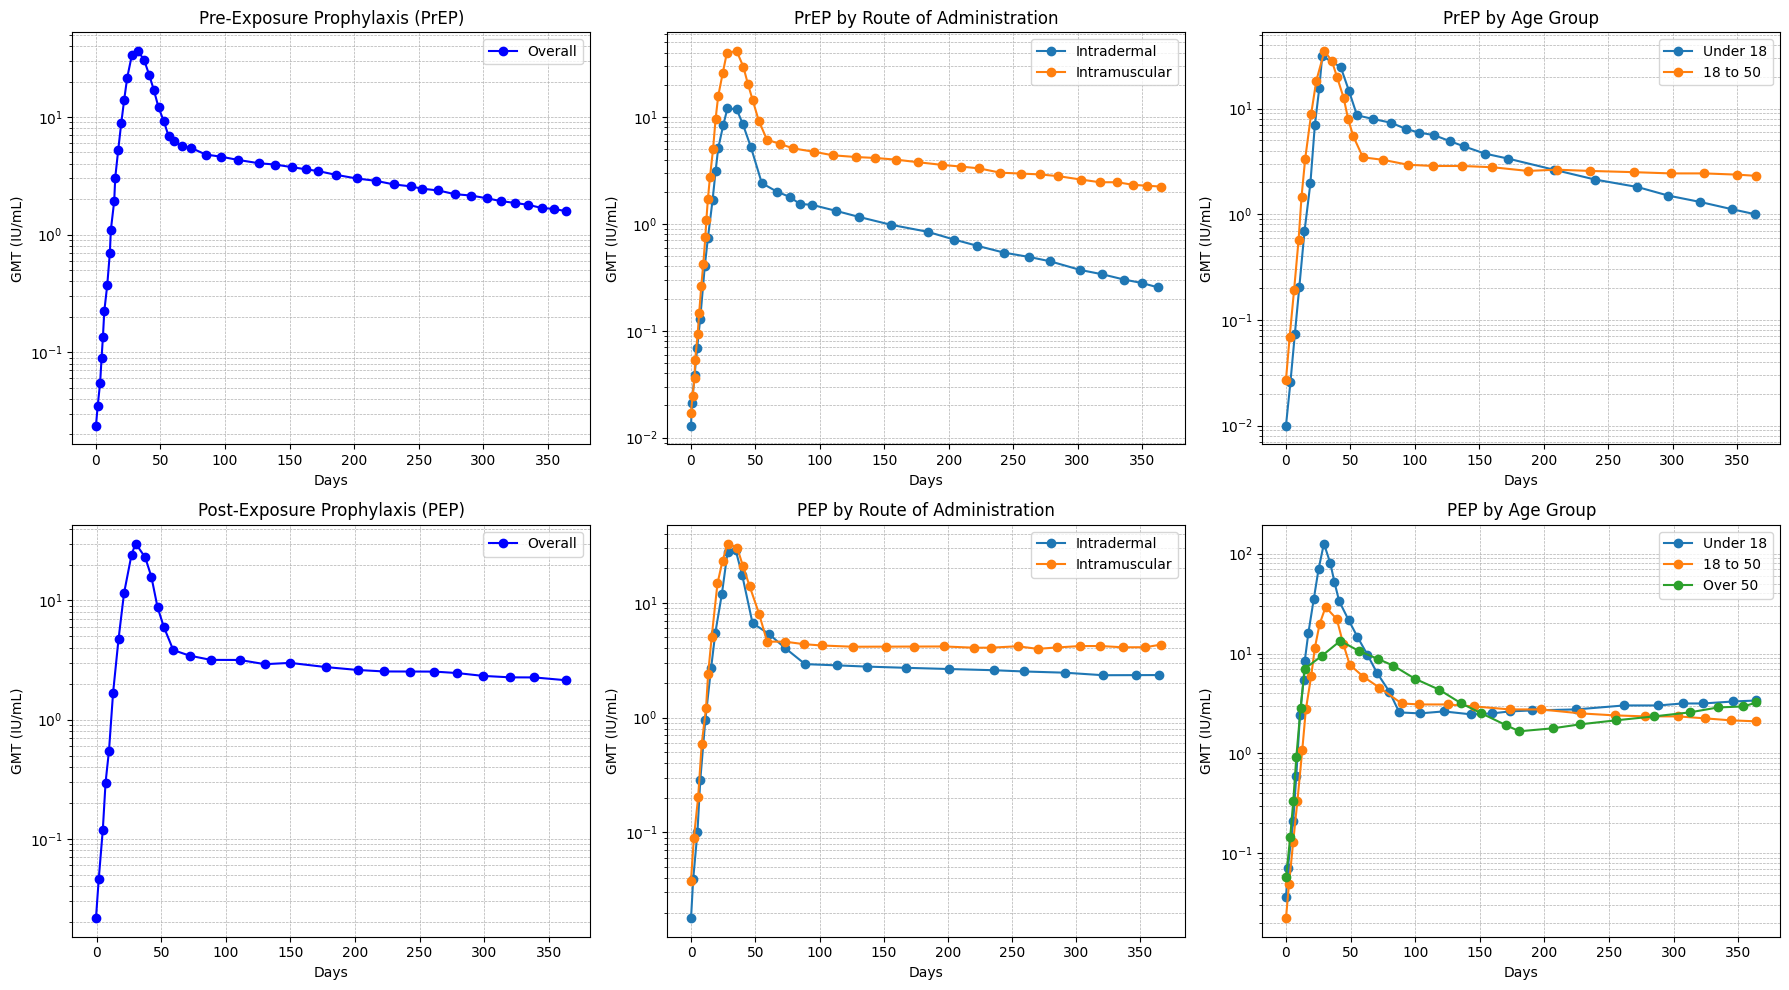

In [10]:
# Organizando os dados para PrEP e PEP
prep_data = {
    'overall': data_prep_overall,
    'by_route': [data_prep_byRoute_intradermal, data_prep_byRoute_intramuscular],
    'by_route_labels': ['Intradermal', 'Intramuscular'],
    'by_age': [data_prep_byAge_under18, data_prep_byAge_18to50],
    'by_age_labels': ['Under 18', '18 to 50']
}

pep_data = {
    'overall': data_pep_overall,
    'by_route': [data_pep_byRoute_intradermal, data_pep_byRoute_intramuscular],
    'by_route_labels': ['Intradermal', 'Intramuscular'],
    'by_age': [data_pep_byAge_under18, data_pep_byAge_18to50, data_pep_byAge_over50],
    'by_age_labels': ['Under 18', '18 to 50', 'Over 50']
}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 linhas, 3 colunas

# Plotar PrEP
axes[0, 0].plot(*zip(*prep_data['overall']), marker='o', linestyle='-', color='blue', label='Overall')
axes[0, 0].set_xlabel('Days')
axes[0, 0].set_ylabel('GMT (IU/mL)')
axes[0, 0].set_yscale('log')
axes[0, 0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0, 0].set_title('Pre-Exposure Prophylaxis (PrEP)')
axes[0, 0].legend()

for data, label in zip(prep_data['by_route'], prep_data['by_route_labels']):
    axes[0, 1].plot(*zip(*data), marker='o', linestyle='-', label=label)
axes[0, 1].set_xlabel('Days')
axes[0, 1].set_ylabel('GMT (IU/mL)')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0, 1].set_title('PrEP by Route of Administration')
axes[0, 1].legend()

for data, label in zip(prep_data['by_age'], prep_data['by_age_labels']):
    axes[0, 2].plot(*zip(*data), marker='o', linestyle='-', label=label)
axes[0, 2].set_xlabel('Days')
axes[0, 2].set_ylabel('GMT (IU/mL)')
axes[0, 2].set_yscale('log')
axes[0, 2].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0, 2].set_title('PrEP by Age Group')
axes[0, 2].legend()

# Plotar PEP
axes[1, 0].plot(*zip(*pep_data['overall']), marker='o', linestyle='-', color='blue', label='Overall')
axes[1, 0].set_xlabel('Days')
axes[1, 0].set_ylabel('GMT (IU/mL)')
axes[1, 0].set_yscale('log')
axes[1, 0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1, 0].set_title('Post-Exposure Prophylaxis (PEP)')
axes[1, 0].legend()

for data, label in zip(pep_data['by_route'], pep_data['by_route_labels']):
    axes[1, 1].plot(*zip(*data), marker='o', linestyle='-', label=label)
axes[1, 1].set_xlabel('Days')
axes[1, 1].set_ylabel('GMT (IU/mL)')
axes[1, 1].set_yscale('log')
axes[1, 1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1, 1].set_title('PEP by Route of Administration')
axes[1, 1].legend()

for data, label in zip(pep_data['by_age'], pep_data['by_age_labels']):
    axes[1, 2].plot(*zip(*data), marker='o', linestyle='-', label=label)
axes[1, 2].set_xlabel('Days')
axes[1, 2].set_ylabel('GMT (IU/mL)')
axes[1, 2].set_yscale('log')
axes[1, 2].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1, 2].set_title('PEP by Age Group')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

#Implementação computacional

## Descrição do Modelo Computacional

O modelo computacional adaptado considera a dinâmica de diferentes componentes do sistema imunológico após a administração da vacina contra a raiva. Os componentes modelados incluem o vírus vacinal, células apresentadoras de antígenos (APCs) imaturas e maduras, células T CD4+ e CD8+, células B, células plasmáticas de curta e longa duração, células B de memória e anticorpos.

As equações diferenciais ordinárias (EDOs) foram utilizadas para descrever a evolução temporal dessas populações celulares e dos títulos de anticorpos. Cada equação foi parametrizada com base em dados imunológicos da literatura, ajustando-se para refletir as particularidades da resposta imunológica à vacina contra a raiva.

##Componentes do Modelo:


* Vírus Vacinal (V0): A replicação e clearance do vírus foram modelados considerando fatores como a interação com anticorpos e células efetoras.
* Células Dendríticas Imaturas e Maturas (Ap e Apm): A transformação de APCs imaturas em maduras é fundamental para a apresentação de antígenos e ativação de células T.
* Células T CD4+ e CD8+: A dinâmica dessas células, desde o estado naïve até as formas efetoras, é crucial para a resposta celular e humoral.
* Células B e Plasmáticas: As células B podem se diferenciar em células plasmáticas, responsáveis pela produção de anticorpos, ou em células de memória, que contribuem para uma resposta imunológica duradoura.
*Anticorpos (A): A produção e decaimento de anticorpos ao longo do tempo refletem a eficácia da vacina na indução de uma imunidade protetora.

In [11]:
# REDUÇÃO DE BM

beta_L  	=	(5.61E-06)*0.3
delta_L  	= ((2.22E-04)*1.8*0.6)*2.0

In [12]:
# EQUAÇÕES

# y[0] - vaccine virus
def V(y, t):
    return  pi_v*y[0] - (c_v1*y[0])/(c_v2+y[0]) - k_v1*y[0]*y[11] - k_v2*y[0]*y[6]

# y[1] - immature APCs
def Ap(y,t):
   return alpha_Ap*(Ap0 - y[1]) - beta_Ap*y[1]*(k_ap1*(y[0])/(k_ap2 + y[0]))


# y[2] - mature APCs
def Apm(y,t):
    return beta_Ap*y[1]*(k_ap1*(y[0])/(k_ap2 + y[0])) - delta_Apm*y[2]

# y[3] - naive CD4+ T cells
def Thn(y,t):
   return  c11*(Thn0 - y[3]) - c12*y[2]*y[3]

# y[4] - efector CD4+ T cells
def The(y,t):
   return  c12*y[2]*y[3] + c13*y[2]*y[4] - c14*y[4]

# y[5] - naive CD8+ T cells
def Tkn(y,t):
    return  alpha_Tn*(Tkn0 - y[5]) - pi_T*y[2]*y[5]

# y[6] - efector CD8+ T cells
def Tke(y,t):
    return  pi_T*y[2]*y[5] + k_te1*y[2]*y[6] - delta_te*y[6]

# y[7] - B cells
def B(y,t):
    return alpha_B*(B0 - y[7]) + pi_B1*y[0]*y[7] + pi_B2*y[4]*y[7] - beta_S*y[2]*y[7] - beta_L*y[4]*y[7] - beta_Bm*y[4]*y[7]

# y[8] - short-lived plasma cells
def Ps(y,t):
   return beta_S*y[2]*y[7] - delta_S*y[8]

# y[9] - long-lived plasma cells
def Pl(y,t):
    return beta_L*y[4]*y[7] - delta_L*y[9] + gamma_M*y[10]

# y[10] - memory B cells
def Bm(y,t):
    return beta_Bm*y[4]*y[7] + k_bm1*y[10]*(1 - y[10]/(k_bm2)) - gamma_M*y[10]

delay_days = 35

# Função de atraso que aplica o atraso somente até o 30º dia
def atraso(t, delay):
    if t <= delay:
        # Aqui, a função exponencial cria um efeito de atraso
        #return np.exp(-(delay - t) / 3.5)  # Ajuste o parâmetro 10 conforme necessário
        return 1

    else:
        return 1  # Após o atraso, o efeito é 1, sem alteração

# Atualizar a função de anticorpos para incluir o atraso somente até o 30º dia
def A(y, t):
    # Introduza o atraso de 30 dias
    A_delay = atraso(t, delay_days)
    return pi_AS * y[8] * A_delay + pi_AL * y[9] * A_delay - delta_A * y[11]

In [13]:
# Resolvendo o sistema de EDOs
def f(y,t):
    return V(y,t),Ap(y,t),Apm(y,t),Thn(y,t),The(y,t),Tkn(y,t),Tke(y,t),B(y,t),Ps(y,t),Pl(y,t),Bm(y,t),A(y,t)

In [14]:
def rodaModelo():
    t = np.linspace(0,5000,20000)
    y,d=integrate.odeint(f, [V0,Ap0,Apm0,Thn0,The0,Tkn0,Tke0,B0,Ps0,Pl0,Bm0,A0], t, full_output=True, printmessg=False)
    return y

In [15]:
# CONDIÇÕES INICIAIS

V0   =    1248.0          # Vaccine virus
Ap0  = 1000000.0 * 0.5    # Immature APCs
Apm0 =       0.0          # Mature APCs
Thn0 = 1000000.0 * 0.5    # Naive CD4+ T cells
The0 =       0.0          # Effector CD4+ T cells
Tkn0 =  500000.0 * 0.5    # Naive CD8+ T cells
Tke0 =       0.0          # Effector CD8+ T cells
B0   =  250000.0 * 0.5    # B cells
Ps0  =       0.0          # Short-lived plasma cells
Pl0  =       0.0          # Long-lived plasma cells
Bm0  =       0.0          # Memory B cells
A0   =     150.0 * 0.001  # Antibodies

## Modelagem PrEP

In [16]:
# PARÂMETROS PrEP

pi_v  	  =	0.01                # Reproduction rate of the vaccine virus
c_v1      = 2.63                # Non-specific viral clearance rate
c_v2      = 0.60                # Saturation effect parameter for viral clearance
k_v1  	  =	0.000120532191*0.4  # Clearance rate due to antibody signaling
k_v2  	  =	1.87E-06*0.4        # Clearance rate due to apoptosis
alpha_Ap  =	2.50E-03            # Homeostasis rate of immature APCs
beta_Ap  	= 5.5e-01             # Conversion rate of immature to mature APCs
k_ap1     = 0.8                 # Conversion parameter for APC maturation
k_ap2     = 40.0                # Saturation effect parameter for APC maturation
delta_Apm	=	5.38E-01            # Decay rate of mature APCs
alpha_Tn  =	2.17E-04            # Homeostasis rate of naïve CD4+ T cells
pi_T  	  =	1.0E-05             # Proliferation rate of effector CD4+ T cells
k_te1     = 1.0E-08             # Clearance rate involving CD4+ T cells
delta_te  = 0.1*0.003           # Decay rate of effector CD4+ T cells
alpha_B  	=	6.0E+00             # Homeostasis rate of B cells
pi_B1  	  =	4.826E-06           # Proliferation rate of B cells
pi_B2  	  =	1.27E-10*100.0      # Proliferation rate of B cells
beta_S  	=	0.000672            # Differentiation rate to short-lived plasma cells
beta_Bm  	=	1.0E-06             # Differentiation rate to memory B cells
delta_S  	=	2.0                 # Decay rate of short-lived plasma cells
gamma_M  	=	(1.95E-06)*500.0    # Production rate of long-lived plasma cells from memory B cells
k_bm1     = 1.0e-5              # Growth rate of memory B cells
k_bm2     = 500.0               # Carrying capacity for memory B cells
pi_AS  	  =	0.002 * 1.25        # Antibody production rate by short-lived plasma cells
pi_AL  	  =	0.00068 * 0.055     # Antibody production rate by long-lived plasma cells
delta_A   = 0.11 * 1.0          # Decay rate of antibodies
c11       = 2.17E-04            # Coefficient for a specific term
c12       = 1.0E-07             # Coefficient for a specific term
c13       = 1E-08               # Coefficient for a specific term
c14       = 0.22                # Coefficient for a specific term

In [17]:
def aplicaDecaimento(t, y, dia_inicio=50, dia_fim=401, taxa_decaimento=0.0080):
    y_mod = y.copy()

    for i in range(len(t)):
        if dia_inicio <= t[i] <= dia_fim:
            decaimento = taxa_decaimento * (t[i] - dia_inicio)
            y_mod[i, -1] -= decaimento  # Aplicando decaimento na última variável (A - anticorpos)
            if y_mod[i, -1] < 0:  # Evitando valores negativos
                y_mod[i, -1] = 0
        elif t[i] > dia_fim:
            break  # Parando o loop após o dia_fim para eficiência

    return y_mod

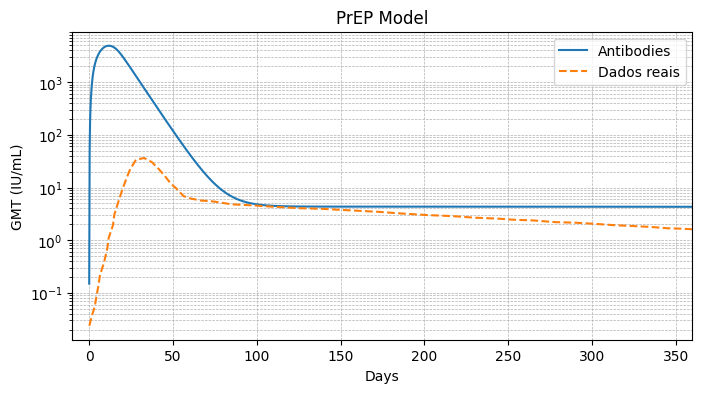

In [18]:
t3=np.linspace(0,5000,20000)

y = rodaModelo()

plt.figure(figsize=(8, 4))
plt.plot(t3, y[:, 11], label='Antibodies')
plt.plot(*zip(*data_prep_overall), linestyle='--', label='Dados reais')
# x_vals, y_vals = zip(*data_prep_overall)
# margin = 0.05 * np.array(y_vals)
# plt.plot(x_vals, y_vals + margin, linestyle='--', color='black', linewidth=0.5)
# plt.plot(x_vals, y_vals - margin, linestyle='--', color='black', linewidth=0.5)
plt.xlabel('Days')
plt.xlim(-10,360)
plt.ylabel('GMT (IU/mL)')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('PrEP Model')
plt.show()

## DE - Erro correction

In [19]:
def erro():
    """
    Função para calcular o erro entre os dados reais e os simulados, além de gerar gráficos.
    """
    t3=np.linspace(0,5000,20000)

    # Obtém os valores simulados do modelo
    y_modelo = rodaModelo()  # A função rodaModelo retorna tempos e dados simulados

    # Desembala os dados reais de 'data_prep_overall'
    tempos_reais, anticorpos_reais = zip(*data_prep_overall)

    # Interpola os valores simulados nos tempos reais
    anticorpos_modelo_interp = np.interp(tempos_reais, t3, y_modelo[:, 11])

    # Calculando o erro (normalizado)
    erro = np.linalg.norm(np.array(anticorpos_reais) - anticorpos_modelo_interp) / np.linalg.norm(anticorpos_reais)

    # #Visualizando a comparação entre os dados reais e simulados
    # plt.figure(figsize=(8, 4))
    # plt.plot(t3, y_modelo[:, 11], label='Anticorpos Modelo', color='red')
    # plt.plot(tempos_reais, anticorpos_reais, linestyle='--', label='Dados Reais', color='blue')

    # #Plotando margens para mostrar a incerteza nos dados reais (se necessário)
    # margin = 0.05 * np.array(anticorpos_reais)  # Ajuste a margem se necessário
    # plt.plot(tempos_reais, np.array(anticorpos_reais) + margin, linestyle='--', color='black', linewidth=0.5)
    # plt.plot(tempos_reais, np.array(anticorpos_reais) - margin, linestyle='--', color='black', linewidth=0.5)

    # #Personalização do gráfico
    # plt.xlabel('Dias')
    # plt.xlim(-10, 360)  # Ajustando o eixo x para o intervalo desejado
    # plt.ylabel('GMT (IU/mL)')
    # plt.yscale('log')  # Usando escala logarítmica para o eixo y
    # plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    # plt.legend()
    # plt.title('Modelo PrEP: Comparação entre Dados Reais e Simulados')
    # plt.show()

    # Retorna o erro calculado
    print(f'Erro Calculado: {erro}')
    return erro

Iniciando otimização com Evolução Diferencial...
Erro Calculado: 0.7016295538995035
Erro Calculado: 0.6143519586264435
Erro Calculado: 0.6329854917132066
Erro Calculado: 1.0000144696624096
Erro Calculado: 0.7117602044247247
Erro Calculado: 0.6716976472126986
Erro Calculado: 0.6330093026021909
Erro Calculado: 0.6329888622490428


/var/folders/9m/ymk089f14m392ptp85kzk68c0000gn/T/ipykernel_67860/583387774.py:3: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y,d=integrate.odeint(f, [V0,Ap0,Apm0,Thn0,The0,Tkn0,Tke0,B0,Ps0,Pl0,Bm0,A0], t, full_output=True, printmessg=False)


Erro Calculado: 0.681970397018224
Erro Calculado: 0.5823034637806053
Erro Calculado: 4.229665924741494
Erro Calculado: 0.8257714332598126
Erro Calculado: 0.703293034975736
Erro Calculado: 0.6617923757677826
Erro Calculado: 0.6938516555791071
Erro Calculado: 0.7349822132555708
Erro Calculado: 0.7349761954332197
Erro Calculado: 0.5677041989888072
Erro Calculado: 4.2296608167776695
Erro Calculado: 0.5999416621314251
Erro Calculado: 0.5686451332600534
Erro Calculado: 0.5220646419669308
Erro Calculado: 1.3656652805971974
Erro Calculado: 0.5220544455179346
Erro Calculado: 4.229659618091317
Erro Calculado: 0.6817502627054964
Erro Calculado: 0.5380183432958464
Erro Calculado: 4.229662172715465
Erro Calculado: 0.5742749929341899
Erro Calculado: 4.229660141703318
Erro Calculado: 0.907395245895501
Erro Calculado: 0.7931854855147497
Erro Calculado: 0.6615899611217113
Erro Calculado: 0.7764595715266149
Erro Calculado: 0.607659898321712
Erro Calculado: 0.6616017438540158
Erro Calculado: 0.6544163166

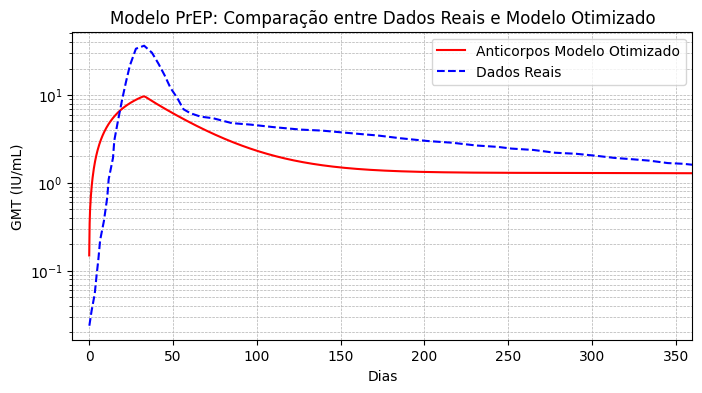

In [27]:
# Função para calcular o erro com base nos parâmetros ajustáveis
def funcao_objetivo(parametros):
    """
    Função objetivo para a DE. Ajusta os parâmetros do modelo e calcula o erro.
    """
    # Atualizar os parâmetros globais do modelo
    global pi_AS, pi_AL, delta_A, beta_S, beta_Bm, gamma_M, alpha_Ap, beta_Ap, delta_S
    global pi_v, k_v1, k_v2, alpha_Ap, beta_Ap, k_ap1, k_ap2, delta_Apm
    global alpha_B, pi_B1, pi_B2, beta_S, beta_Bm, delta_S, gamma_M, k_bm1, k_bm2

    (
        pi_AS, pi_AL, delta_A, beta_S, beta_Bm, gamma_M, alpha_Ap, beta_Ap, delta_S,
        pi_v, k_v1, k_v2, alpha_Ap, beta_Ap, k_ap1, k_ap2, delta_Apm,
        alpha_B, pi_B1, pi_B2, beta_S, beta_Bm, delta_S, gamma_M, k_bm1, k_bm2
    ) = parametros

    # Calcula o erro usando a função já definida
    erro_atual = erro()

    # Apenas exibe o erro no console, sem plotagem
    if erro_atual < 0.5:
        print(f"################ Erro atual (abaixo de 0.5 ################): {erro_atual:.4f}")

    return erro_atual  # Retorna o erro para a DE

def plot_modelo_final():
    """
    Plota o gráfico do modelo otimizado e os dados reais.
    """
    t3 = np.linspace(0, 5000, 20000)
    y_modelo = rodaModelo()  # Obtém os valores simulados

    # Desembala os dados reais
    tempos_reais, anticorpos_reais = zip(*data_prep_overall)

    # Plotar os gráficos
    plt.figure(figsize=(8, 4))
    plt.plot(t3, y_modelo[:, 11], label='Anticorpos Modelo Otimizado', color='red')
    plt.plot(tempos_reais, anticorpos_reais, linestyle='--', label='Dados Reais', color='blue')

    # Configurações do gráfico
    plt.xlabel('Dias')
    plt.ylabel('GMT (IU/mL)')
    plt.yscale('log')
    plt.xlim(-10,360)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.title('Modelo PrEP: Comparação entre Dados Reais e Modelo Otimizado')
    plt.show()

# Definir os limites dos parâmetros para a DE
limites = [
    (pi_AS * 0.5, pi_AS * 2.0),             # pi_AS
    (pi_AL * 0.5, pi_AL * 2.0),             # pi_AL
    (delta_A * 0.5, delta_A * 2.0),         # delta_A
    (beta_S * 0.5, beta_S * 2.0),           # beta_S
    (beta_Bm * 0.5, beta_Bm * 2.0),         # beta_Bm
    (gamma_M * 0.5, gamma_M * 2.0),         # gamma_M
    (alpha_Ap * 0.5, alpha_Ap * 2.0),       # alpha_Ap
    (beta_Ap * 0.5, beta_Ap * 2.0),         # beta_Ap
    (delta_S * 0.5, delta_S * 2.0),         # delta_S
    (pi_v * 0.5, pi_v * 2.0),               # pi_v
    (k_v1 * 0.5, k_v1 * 2.0),               # k_v1
    (k_v2 * 0.5, k_v2 * 2.0),               # k_v2
    (alpha_Ap * 0.5, alpha_Ap * 2.0),       # alpha_Ap (repetida para consistência)
    (beta_Ap * 0.5, beta_Ap * 2.0),         # beta_Ap (repetida para consistência)
    (k_ap1 * 0.5, k_ap1 * 2.0),             # k_ap1
    (k_ap2 * 0.5, k_ap2 * 2.0),             # k_ap2
    (delta_Apm * 0.5, delta_Apm * 2.0),     # delta_Apm
    (alpha_B * 0.5, alpha_B * 2.0),         # alpha_B
    (pi_B1 * 0.5, pi_B1 * 2.0),             # pi_B1
    (pi_B2 * 0.5, pi_B2 * 2.0),             # pi_B2
    (beta_S * 0.5, beta_S * 2.0),           # beta_S (repetida para consistência)
    (beta_Bm * 0.5, beta_Bm * 2.0),         # beta_Bm (repetida para consistência)
    (delta_S * 0.5, delta_S * 2.0),         # delta_S (repetida para consistência)
    (gamma_M * 0.5, gamma_M * 2.0),         # gamma_M (repetida para consistência)
    (k_bm1 * 0.5, k_bm1 * 2.0),             # k_bm1
    (k_bm2 * 0.5, k_bm2 * 2.0),             # k_bm2
]

# Aplicar a Evolução Diferencial
print("Iniciando otimização com Evolução Diferencial...")
resultado = differential_evolution(
    funcao_objetivo,
    limites,
    strategy='best1bin',
    maxiter=1000,
    popsize=50,
    disp=True  # Exibe progresso básico no console
)

# Recuperar os parâmetros otimizados
parametros_otimizados = resultado.x

# Exibir os resultados
print("\nParâmetros Otimizados:")
parametros_nomes = [
    "pi_AS", "pi_AL", "delta_A", "beta_S", "beta_Bm", "gamma_M", "alpha_Ap", "beta_Ap", "delta_S",
    "pi_v", "k_v1", "k_v2", "alpha_Ap", "beta_Ap", "k_ap1", "k_ap2", "delta_Apm",
    "alpha_B", "pi_B1", "pi_B2", "beta_S", "beta_Bm", "delta_S", "gamma_M", "k_bm1", "k_bm2"
]
for nome, valor in zip(parametros_nomes, parametros_otimizados):
    print(f"{nome} = {valor:.6f}")

# Recalcular o erro com os parâmetros otimizados
erro_apos_otimizacao = erro()
print(f"\nErro após otimização: {erro_apos_otimizacao}")

# Plotar o gráfico final com os parâmetros otimizados
plot_modelo_final()


##Modelagem PEP

In [ ]:
# PARÂMETROS PEP

pi_v  	  =	0.01                # Reproduction rate of the vaccine virus
c_v1      = 2.63                # Non-specific viral clearance rate
c_v2      = 0.60                # Saturation effect parameter for viral clearance
k_v1  	  =	0.000120532191*0.4  # Clearance rate due to antibody signaling
k_v2  	  =	1.87E-06*0.4        # Clearance rate due to apoptosis
alpha_Ap  =	2.50E-03            # Homeostasis rate of immature APCs
beta_Ap  	= 5.5e-01             # Conversion rate of immature to mature APCs
k_ap1     = 0.8                 # Conversion parameter for APC maturation
k_ap2     = 40.0                # Saturation effect parameter for APC maturation
delta_Apm	=	5.38E-01            # Decay rate of mature APCs
alpha_Tn  =	2.17E-04            # Homeostasis rate of naïve CD4+ T cells
pi_T  	  =	1.0E-05             # Proliferation rate of effector CD4+ T cells
k_te1     = 1.0E-08             # Clearance rate involving CD4+ T cells
delta_te  = 0.1*0.003           # Decay rate of effector CD4+ T cells
alpha_B  	=	6.0E+00             # Homeostasis rate of B cells
pi_B1  	  =	4.826E-06           # Proliferation rate of B cells
pi_B2  	  =	1.27E-10*100.0      # Proliferation rate of B cells
beta_S  	=	0.000672            # Differentiation rate to short-lived plasma cells
beta_Bm  	=	1.0E-06             # Differentiation rate to memory B cells
delta_S  	=	2.0                 # Decay rate of short-lived plasma cells
gamma_M  	=	(1.95E-06)*500.0    # Production rate of long-lived plasma cells from memory B cells
k_bm1     = 1.0e-5              # Growth rate of memory B cells
k_bm2     = 2500.0              # Carrying capacity for memory B cells
pi_AS  	  =	0.002 * 1.20        # Antibody production rate by short-lived plasma cells
pi_AL  	  =	0.00068 * 0.03      # Antibody production rate by long-lived plasma cells
delta_A   = 0.11 * 0.9          # Decay rate of antibodies
c11       = 2.17E-04            # Coefficient for a specific term
c12       = 1.0E-07             # Coefficient for a specific term
c13       = 1E-08               # Coefficient for a specific term
c14       = 0.22                # Coefficient for a specific term

In [ ]:
t3=np.linspace(0,5000,20000)

y = rodaModelo()

plt.figure(figsize=(8, 4))
plt.plot(t3, y[:, 11], label='Antibodies')
plt.plot(*zip(*data_pep_overall), linestyle='--', label='Dados reais')
# x_vals, y_vals = zip(*data_pep_overall)
# margin = 0.05 * np.array(y_vals)
# plt.plot(x_vals, y_vals + margin, linestyle='--', color='black', linewidth=0.5)
# plt.plot(x_vals, y_vals - margin, linestyle='--', color='black', linewidth=0.5)
plt.xlabel('Days')
plt.xlim(-10,360)
plt.ylabel('GMT (IU/mL)')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('PEP Model')
plt.show()

#Resultados e Discussão


Os resultados do modelo foram obtidos ao resolver o sistema de EDOs para um intervalo de tempo de 5.000 dias. As simulações revelaram a dinâmica dos títulos de anticorpos ao longo do tempo, destacando a influência de diferentes parâmetros como a taxa de reprodução do vírus vacinal, a taxa de maturação das APCs e as taxas de proliferação e decaimento das células T e B.

Os gráficos gerados a partir das simulações mostram que o modelo é capaz de capturar a essência da resposta imunológica à vacinação contra a raiva, sendo coerente com as observações empíricas descritas na literatura revisada. Em particular, o modelo destaca como variações nos parâmetros podem influenciar significativamente a longevidade e a magnitude da resposta imune, o que é consistente com os achados da meta-análise sobre a influência de diferentes esquemas de vacinação e faixas etárias.

Esta adaptação do modelo imunológico oferece uma ferramenta valiosa para explorar a resposta imune à vacinação contra a raiva, podendo contribuir para a otimização dos esquemas de vacinação e, consequentemente, para a melhoria das estratégias de controle e prevenção da raiva em diferentes populações.